## Backtesting using historical prices

In [1]:
import datetime as dt
from datetime import timedelta
import numpy as np
import pandas as pd
from numpy import dot
from numpy import divide
from numpy.linalg import multi_dot as mdot
from numpy.linalg import inv
import matplotlib.pyplot as plt
from matplotlib import rc
import quadprog
import yfinance
import os
from weights import Portfolio
np.set_printoptions(precision = 3, suppress = True, linewidth = 400)

### Downloading historical data

In [2]:
tickers = ['SPY', 'XLF', 'EEM', 'EWZ', 'SLV', 'FXI', 'GDX', 'HYG', 'TLT', 'XLU']
#etfs = yfinance.download(tickers, auto_adjust = True, start = "2011-9-1", end='2019-9-1')['Close']
etfs = yfinance.download(tickers, start = "2011-9-1")['Close']

[*********************100%***********************]  10 of 10 completed


In [3]:
etfs = etfs/etfs.iloc[0]
etfs = etfs.pct_change().iloc[1:]*100

In [4]:
etfs.to_csv("../data/etfs.csv", sep=";")

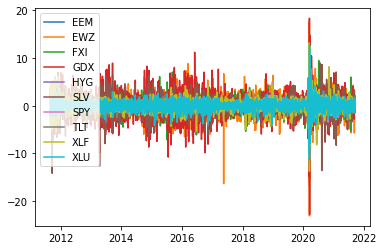

In [5]:
plt.plot(etfs, label= etfs.columns)
plt.legend()

In [6]:
spx = pd.read_csv('../data/spx.csv').stack().tolist()
spx_small = spx[:10]

In [7]:
#port = Portfolio(spx_small, start = "2016-1-1")
port = Portfolio(tickers, start = "2011-9-1")

[*********************100%***********************]  10 of 10 completed


In [8]:
backtest_start = "2018-1-1"
res, eff = port.backtest(backtest_start = backtest_start)

Sharpe Ratio Minimum variance: 12.110791812958745
Sharpe Ratio Efficient portfolio: 3.2080221720531795e+68


In [9]:
eff_weights = pd.DataFrame(eff, columns = ["Date", *port.returns.columns])
eff_weights.set_index("Date", inplace = True)

### Performance Plot

[*********************100%***********************]  1 of 1 completed


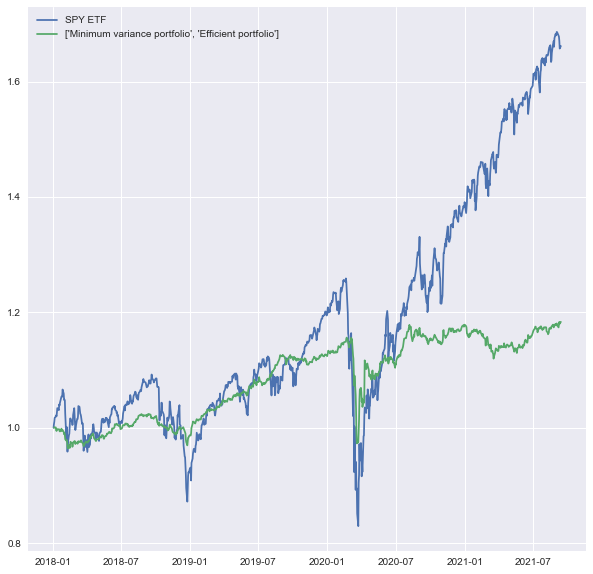

In [11]:
plt.style.use('seaborn')
spx_data = yfinance.download(['SPY'], start = backtest_start)['Close']
spx_data = spx_data/spx_data.iloc[0]
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.plot(spx_data, label="SPY ETF")
ax.plot(res["Minimum variance"], label=['Minimum variance portfolio', 'Efficient portfolio'])
ax.legend()

### Using numerical solver

In [18]:
#res = quadprog.solve_qp(G=Sigma, a = np.zeros(len(Sigma_inv)), C = np.ones((len(Sigma_inv), 1)), b=np.ones(1), meq=1)